<a href="https://colab.research.google.com/github/gregoriullmann/Trabalho_ANN_01_opcao02/blob/main/CNN_trabalho2_Gregori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib.image import imread
import cv2
import sklearn 
import pandas as pd
from sklearn.metrics import confusion_matrix

In [21]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/ANN/Trabalho_02
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ANN/Trabalho_02
CNN_trabalho2_Gregori.ipynb  train/  val/


In [22]:
# diretórios - atribuindo os diretórios com imagens de treino (train) e de validação (val) às variáveis train_dir e val_dir, respectivamente.
train_dir = r"/content/drive/My Drive/ANN/Trabalho_02/train" 
val_dir = r"/content/drive/My Drive/ANN/Trabalho_02/val"

cavalo_train_dir = train_dir + '/cavalo'
ovelha_train_dir = train_dir + '/ovelha'
vaca_train_dir = train_dir + '/vaca'


cavalo_val_dir = val_dir + '/cavalo'
ovelha_val_dir = val_dir + '/ovelha'
vaca_val_dir = val_dir + '/vaca'


In [23]:
#definição do tamanho das imagens
batch_size = 32
img_height = 168
img_width = 168

In [24]:
#definição das classes 0, 1 e 2, e atribuição das classes dos animais à estas classes numéricas
class_names = ['cavalo', 'ovelha', 'vaca']
num_classes = len(class_names)
class_indexes = [0, 1, 2]

In [25]:
# funçao para carregar imagens no formato .jpeg
def loadImagesInPath1(path : str ):
    ret_vec = []
    for file in os.listdir(path):
        if file.endswith(".jpeg"):
            ret_vec.append(imread(os.path.join(path, file)))
    return np.asarray(ret_vec)

In [26]:
# leitura dos arquivos de modo manual, só para ter certeza do que tá acontecendo
import os
# treino
cavalo_train = loadImagesInPath1(cavalo_train_dir)
ovelha_train = loadImagesInPath1(ovelha_train_dir)
vaca_train = loadImagesInPath1(vaca_train_dir)


# teste/validação
cavalo_val = loadImagesInPath1(cavalo_val_dir)
ovelha_val = loadImagesInPath1(ovelha_val_dir)
vaca_val = loadImagesInPath1(vaca_val_dir)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [27]:
# Verificação do tamanho do dataset utilizado para treinamento
print(cavalo_train.shape)
print(ovelha_train.shape)
print(vaca_train.shape)


(2123,)
(1166,)
(1513,)


In [28]:
# Criação das etiquetas para classificação das imagens (ex: imagem de cavalo (x) recebe etiqueta cavalo (y))
cavalo_train_label = np.full((cavalo_train.shape[0], 1), 0, dtype=np.uint8)
ovelha_train_label = np.full((ovelha_train.shape[0], 1), 1, dtype=np.uint8)
vaca_train_label = np.full((vaca_train.shape[0], 1), 2, dtype=np.uint8)

# e para validação
cavalo_val_label = np.full((cavalo_val.shape[0], 1), 0, dtype=np.uint8)
ovelha_val_label = np.full((ovelha_val.shape[0], 1), 1, dtype=np.uint8)
vaca_val_label = np.full((vaca_val.shape[0], 1), 2, dtype=np.uint8)


In [29]:
# Unir o conjuto de dados (imagens) para treino
x_train = np.concatenate((cavalo_train, ovelha_train, vaca_train),axis=0)
y_train_m = np.concatenate((cavalo_train_label, ovelha_train_label, vaca_train_label),axis=0)

# e para validação/teste
x_val = np.concatenate((cavalo_val, ovelha_val, vaca_val),axis=0)
y_val_m = np.concatenate((cavalo_val_label, ovelha_val_label, vaca_val_label),axis=0)

print(x_train.shape)
print(y_train_m.shape)
print(x_val.shape)
print(y_val_m.shape)

(4802,)
(4802, 1)
(1131,)
(1131, 1)


In [30]:
# Aleatorização os dados (embaralhar os dados para evitar um padrão forçado)
def aleatorizacao(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

x_train, y_train_m = aleatorizacao(x_train, y_train_m)
x_val, y_val_m = aleatorizacao(x_val, y_val_m)

vaca


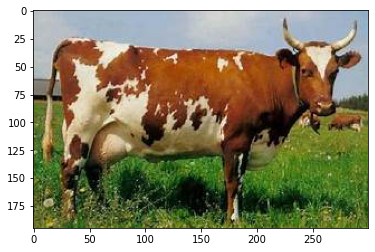

In [31]:
# verifica alguma imagem
index = 250
img = x_train[index]
plt.imshow(x_train[index])
print(class_names[y_train_m[index][0]])

In [32]:
#criação de uma função para padronizar o tamanho da imagem
def transformar(x):
  rx = np.zeros(shape=(x.shape[0],168,168,3))
  for i in range(x.shape[0]):
    rx[i] = cv2.resize(x[i], (168,168))
  return rx/255.0

x_train_transformed.shape:  (4802, 168, 168, 3)
x_val_transformed.shape:  (1131, 168, 168, 3)


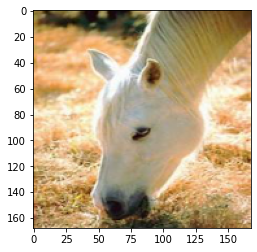

In [33]:
# usa a função transformar criada
x_train_transformed = transformar(x_train)
x_val_transformed =  transformar(x_val)

print('x_train_transformed.shape: ', x_train_transformed.shape )
print('x_val_transformed.shape: ', x_val_transformed.shape )

#plota 2 imagens para conferência do funcionamento da função     
plt.imshow(x_train_transformed[200], cmap=plt.cm.gray)
plt.imshow(x_train_transformed[500], cmap=plt.cm.gray)

In [34]:
# Recodifica as estiquetas de classificação para o treinamento e a validação 
y_train = tf.keras.utils.to_categorical(y_train_m)
y_val = tf.keras.utils.to_categorical(y_val_m)

In [35]:
#modelo da rede
model = tf.keras.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(168, 168, 3)),                          
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
    

      layers.Flatten(),
      layers.Dense(250, activation='relu'),
      layers.Dense(num_classes, activation='softmax')
    ])



model.compile( loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 166, 166, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 83, 83, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 81, 81, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 64)        3

In [36]:
hist = model.fit(x_train_transformed, y_train, batch_size = 128, epochs = 12)

Epoch 1/12
38/38 [==============================] - 228s 6s/step - loss: 1.0474 - accuracy: 0.4721
Epoch 2/12
38/38 [==============================] - 221s 6s/step - loss: 0.9177 - accuracy: 0.5591
Epoch 3/12
38/38 [==============================] - 223s 6s/step - loss: 0.7994 - accuracy: 0.6297
Epoch 4/12
38/38 [==============================] - 220s 6s/step - loss: 0.7191 - accuracy: 0.6810
Epoch 5/12
38/38 [==============================] - 223s 6s/step - loss: 0.6660 - accuracy: 0.7099
Epoch 6/12
38/38 [==============================] - 222s 6s/step - loss: 0.6002 - accuracy: 0.7428
Epoch 7/12
38/38 [==============================] - 224s 6s/step - loss: 0.5201 - accuracy: 0.7799
Epoch 8/12
38/38 [==============================] - 223s 6s/step - loss: 0.4531 - accuracy: 0.8159
Epoch 9/12
38/38 [==============================] - 223s 6s/step - loss: 0.3915 - accuracy: 0.8446
Epoch 10/12
38/38 [==============================] - 223s 6s/step - loss: 0.2520 - accuracy: 0.9063
Epoch 11/

In [37]:
#salvar modelo no meu drive para não ter que fazer tudo novamente
model.save('model_Trabalho02_gregori')

INFO:tensorflow:Assets written to: model_Trabalho02_gregori/assets


In [38]:
#função para verificar o funcionamento da rede - pega uma imagem e apresenta sua classificação
def verificar(img):
    pred = model.predict(transformar(np.asarray([img])))
    class_index = int(np.argmax(pred[0]))
    print("{} - {:.2f}%".format(class_names[class_index], np.max(pred)*100.0 ))
    print(pred[0]*100.)
    print(class_names)

In [39]:
# Verificação da acurácia do modelo
evaluate_res = model.evaluate(x_val_transformed, y_val)

36/36 [==============================] - 14s 380ms/step - loss: 1.2287 - accuracy: 0.7215


cavalo - 88.99%
[88.98716    4.9385214  6.074317 ]
['cavalo', 'ovelha', 'vaca']


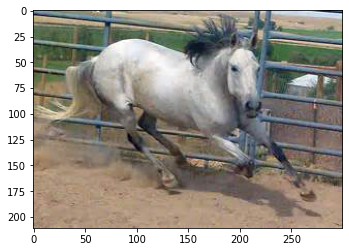

In [51]:
# Verificando...
img = imread(r'/content/drive/My Drive/ANN/Trabalho_02/val/cavalo/(400).jpeg')
plt.imshow(img)
verificar(img)

In [41]:
#Geração da matriz de confusão e as métricas de avaliação do modelo
y_pred = model.predict(x_val_transformed)
y_pred = np.argmax(y_pred, axis=1)
y_val = np.argmax(y_val, axis=1)
print(confusion_matrix(y_val, y_pred))
class_index = int(np.argmax(y_pred[0]))

print(class_names)
print(sklearn.metrics.classification_report(y_val, y_pred))

[[403  13  84]
 [ 48 161  69]
 [ 58  43 252]]
['cavalo', 'ovelha', 'vaca']
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       500
           1       0.74      0.58      0.65       278
           2       0.62      0.71      0.66       353

    accuracy                           0.72      1131
   macro avg       0.72      0.70      0.70      1131
weighted avg       0.73      0.72      0.72      1131

